<a href="https://colab.research.google.com/github/kaushikrahul1993/HR-Domain/blob/main/Domain_HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import math

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
attrition = pd.read_csv('Attrition.csv')
attrition.sample(n=5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
581,30,No,Travel_Rarely,921,Research & Development,1,3,Life Sciences,1,806,4,Male,38,1,1,Laboratory Technician,3,Married,3833,24375,3,Y,No,21,4,3,80,2,7,2,3,2,2,0,2
1127,23,No,Travel_Rarely,977,Research & Development,10,3,Technical Degree,1,1592,4,Male,45,4,1,Research Scientist,3,Married,2073,12826,2,Y,No,16,3,4,80,1,4,2,3,2,2,2,2
1215,35,No,Travel_Frequently,146,Research & Development,2,4,Medical,1,1704,1,Male,79,2,1,Research Scientist,4,Single,4930,13970,0,Y,Yes,14,3,3,80,0,6,2,4,5,4,1,4
1136,28,Yes,Travel_Rarely,329,Research & Development,24,3,Medical,1,1604,3,Male,51,3,1,Laboratory Technician,2,Married,2408,7324,1,Y,Yes,17,3,3,80,3,1,3,3,1,1,0,0
1393,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,4,Male,44,3,2,Sales Executive,4,Single,4105,5099,1,Y,No,14,3,1,80,0,7,5,3,7,7,0,7


In [ ]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
attrition.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
remove_col=[]
cat_col=[]
for col in attrition.columns:
  unique=len(attrition[col].value_counts())
  print(f"{col}:{unique}")
  if unique==1 or unique== len(attrition):
    remove_col.append(col)
  elif unique>1 and unique<10:
    cat_col.append(col)
print(len(remove_col),remove_col)
print(len(cat_col),cat_col)

Age:43
Attrition:2
BusinessTravel:3
DailyRate:886
Department:3
DistanceFromHome:29
Education:5
EducationField:6
EmployeeCount:1
EmployeeNumber:1470
EnvironmentSatisfaction:4
Gender:2
HourlyRate:71
JobInvolvement:4
JobLevel:5
JobRole:9
JobSatisfaction:4
MaritalStatus:3
MonthlyIncome:1349
MonthlyRate:1427
NumCompaniesWorked:10
Over18:1
OverTime:2
PercentSalaryHike:15
PerformanceRating:2
RelationshipSatisfaction:4
StandardHours:1
StockOptionLevel:4
TotalWorkingYears:40
TrainingTimesLastYear:7
WorkLifeBalance:4
YearsAtCompany:37
YearsInCurrentRole:19
YearsSinceLastPromotion:16
YearsWithCurrManager:18
4 ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
18 ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


In [ ]:
attrition=attrition.drop(columns=remove_col)
attrition.sample(n=5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
470,24,No,Travel_Frequently,535,Sales,24,3,Medical,4,Male,38,3,1,Sales Representative,4,Married,2400,5530,0,No,13,3,3,2,3,3,3,2,2,2,1
285,37,No,Travel_Rarely,1372,Research & Development,1,3,Life Sciences,4,Female,42,3,1,Research Scientist,4,Single,2115,15881,1,No,12,3,2,0,17,3,3,17,12,5,7
173,30,No,Non-Travel,111,Research & Development,9,3,Medical,3,Male,66,3,2,Laboratory Technician,1,Divorced,3072,11012,1,No,11,3,3,2,12,4,3,12,9,6,10
264,28,Yes,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,Male,79,3,1,Laboratory Technician,3,Single,3485,14935,2,No,11,3,3,0,5,5,1,0,0,0,0
1081,35,No,Travel_Rarely,1029,Research & Development,16,3,Life Sciences,4,Female,91,2,3,Healthcare Representative,2,Single,8606,21195,1,No,19,3,4,0,11,3,1,11,8,3,3


In [ ]:
num_col=[col for col in (attrition.columns) if col not in cat_col]
print(len(num_col),num_col)

13 ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
attrition.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [ ]:
print(cat_col)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


In [ ]:
#for col in cat_col:
  #attrition[col]=attrition[col].astype(str)


In [ ]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install ydata-profiling

In [ ]:
!pip install pydantic-settings

In [ ]:
from pydantic_settings import BaseSettings

In [ ]:
#import pandas_profiling
import ydata_profiling

In [ ]:
profile = ydata_profiling.ProfileReport(attrition)
profile.to_file(output_file='hr_analytics.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def hist_plot_num(col,num_col_list, df,bin):
    col_cnt=len(num_col_list)
    div=col
    if col_cnt%div==0:
        rows = int(col_cnt/div)
        print(f"rows={rows}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.histplot(df[col_plot[i]],palette='bright',bins=bin, kde=True)
                plt.grid(visible= True, which='both', axis = "both",)
                plt.title(col_plot[i])
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.show()
    else:
        rows = int(col_cnt/div)
        print(f"rows={rows+1}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.histplot(df[col_plot[i]],palette='bright',bins=bin,kde=True)
                plt.title(col_plot[i])
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.figure(figsize=(100,10))
        plt.subplots(1,(col_cnt-j))
        col_plot=num_col_list[j:col_cnt]
        for i in range(0,(col_cnt-j)):
            plt.subplot(1,(col_cnt-j),i+1)
            sns.histplot(df[col_plot[i]],palette='bright',bins=bin,kde=True)
            plt.title(col_plot[i])
            plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
        plt.subplots_adjust(wspace=0.9)
        plt.show()

rows=7, Col:2, Total:13


<Figure size 10000x1000 with 0 Axes>

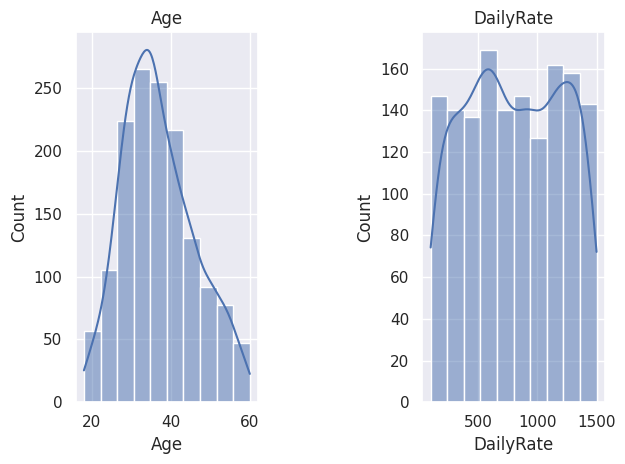

<Figure size 10000x1000 with 0 Axes>

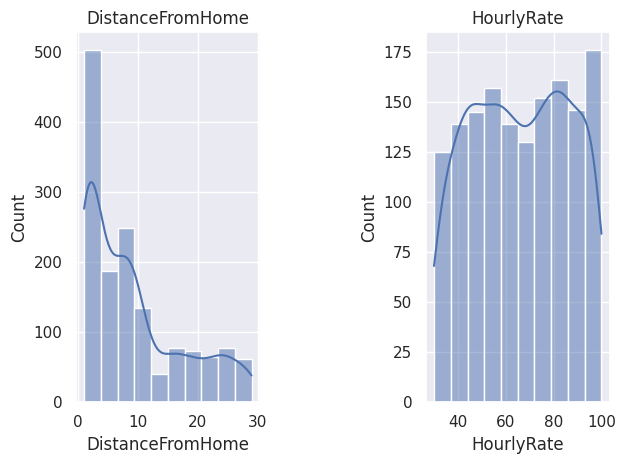

<Figure size 10000x1000 with 0 Axes>

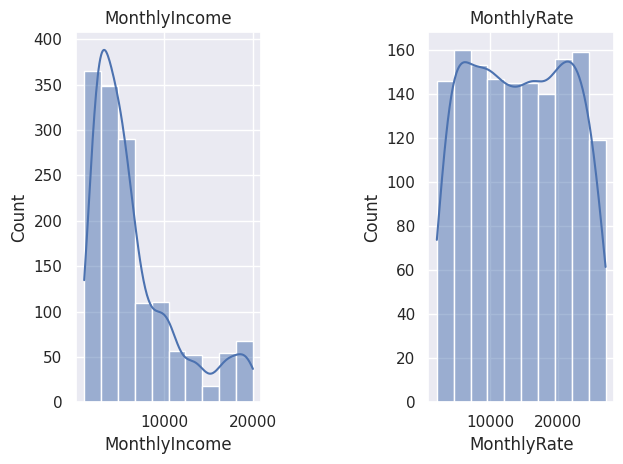

<Figure size 10000x1000 with 0 Axes>

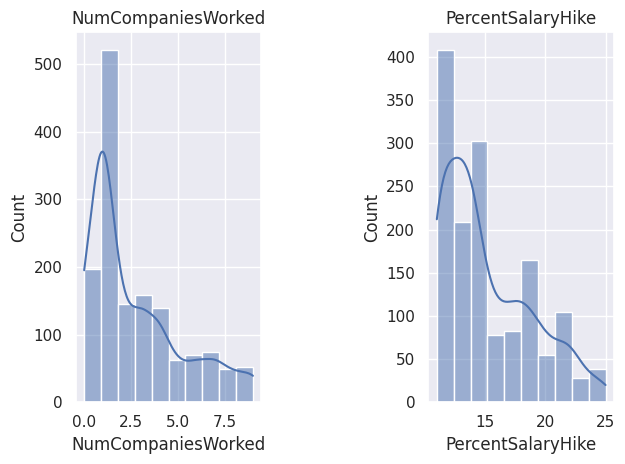

<Figure size 10000x1000 with 0 Axes>

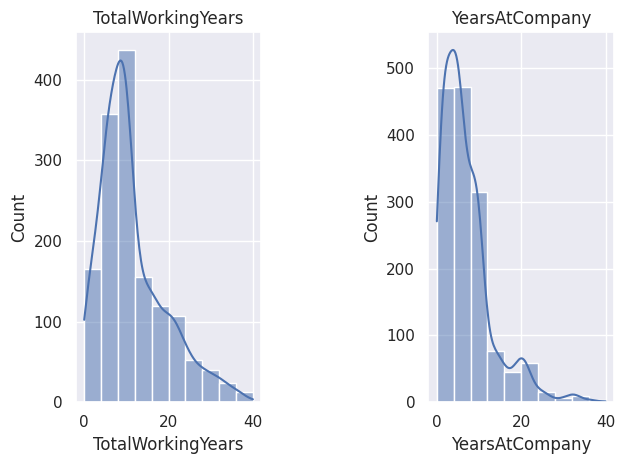

<Figure size 10000x1000 with 0 Axes>

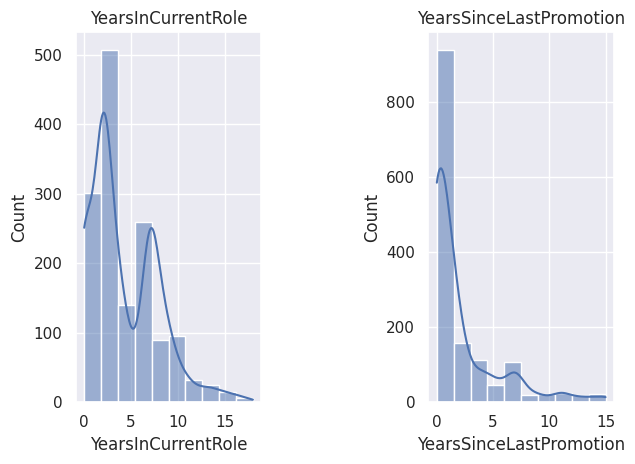

<Figure size 10000x1000 with 0 Axes>

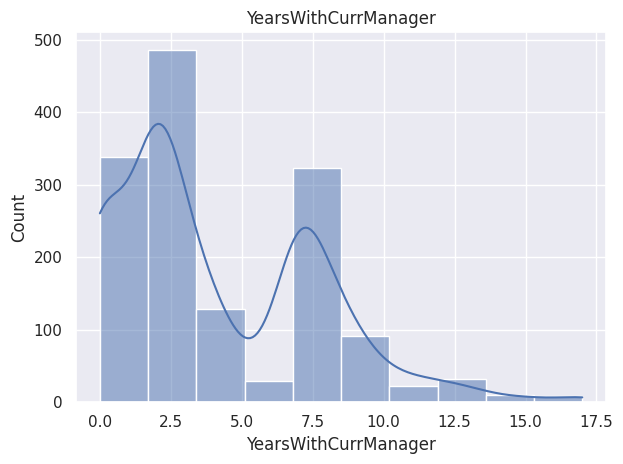

In [ ]:
hist_plot_num(col=2,num_col_list=num_col, df=attrition,bin=10)

In [ ]:
def box_plot_num(col,num_col_list, df,bin):
    col_cnt=len(num_col_list)
    div=col
    if col_cnt%div==0:
        rows = int(col_cnt/div)
        print(f"rows={rows}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.boxplot(df[col_plot[i]],palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.show()
    else:
        rows = int(col_cnt/div)
        print(f"rows={rows+1}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.boxplot(df[col_plot[i]],palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.figure(figsize=(100,10))
        plt.subplots(1,(col_cnt-j))
        col_plot=num_col_list[j:col_cnt]
        for i in range(0,(col_cnt-j)):
            plt.subplot(1,(col_cnt-j),i+1)
            sns.boxplot(df[col_plot[i]],palette='bright')
            plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
        plt.subplots_adjust(wspace=0.9)
        plt.show()

rows=7, Col:2, Total:13


<Figure size 10000x1000 with 0 Axes>

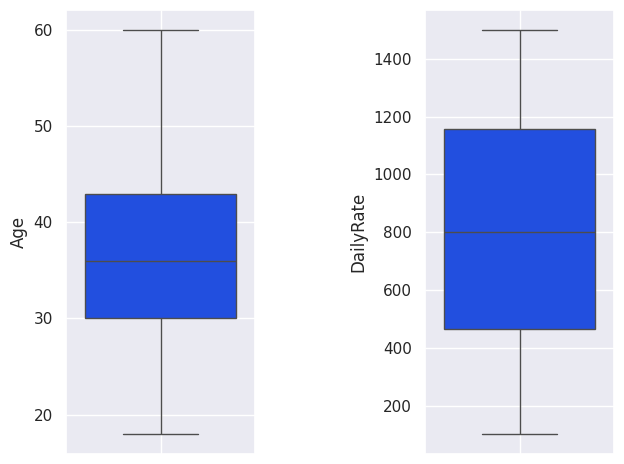

<Figure size 10000x1000 with 0 Axes>

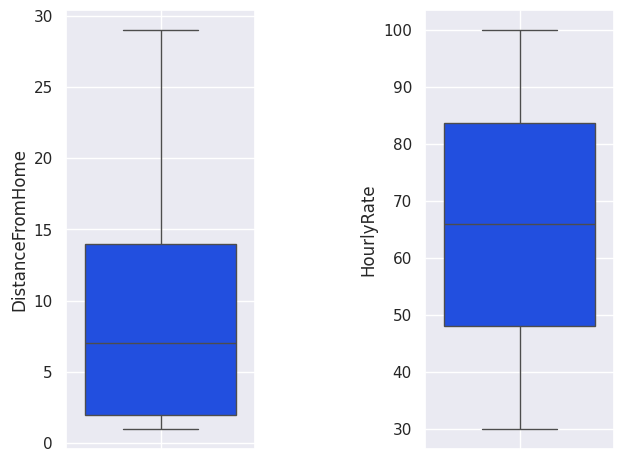

<Figure size 10000x1000 with 0 Axes>

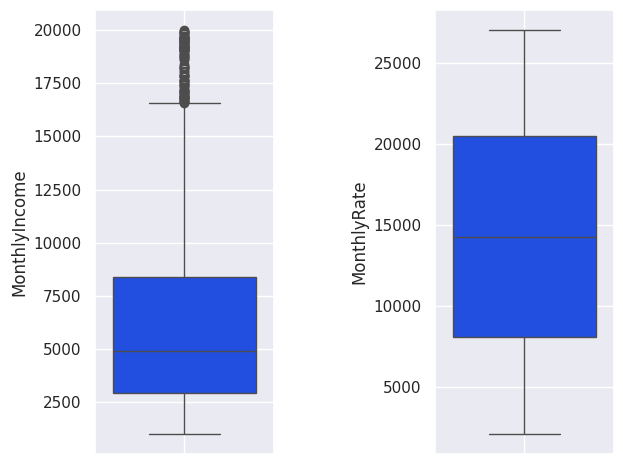

<Figure size 10000x1000 with 0 Axes>

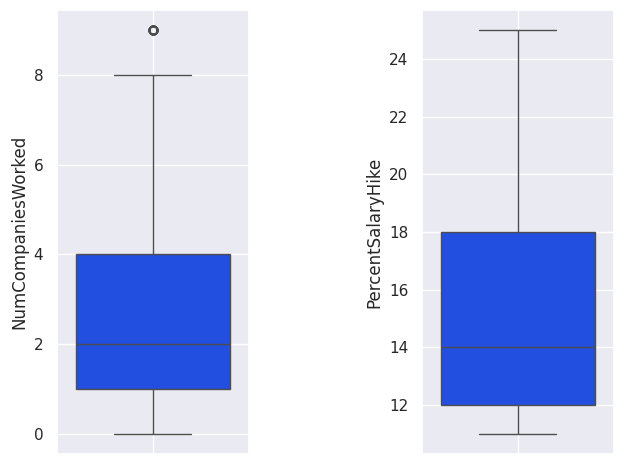

<Figure size 10000x1000 with 0 Axes>

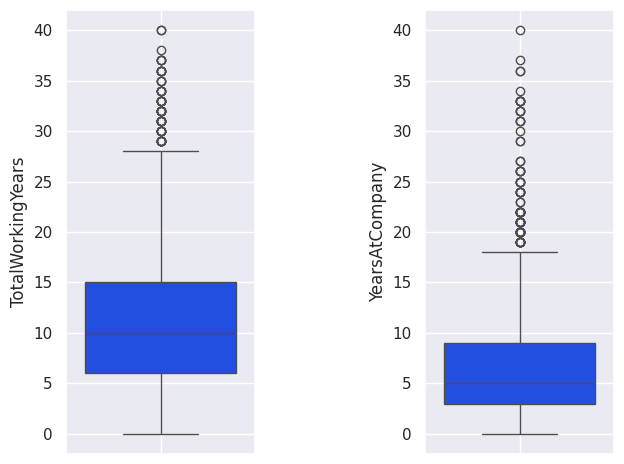

<Figure size 10000x1000 with 0 Axes>

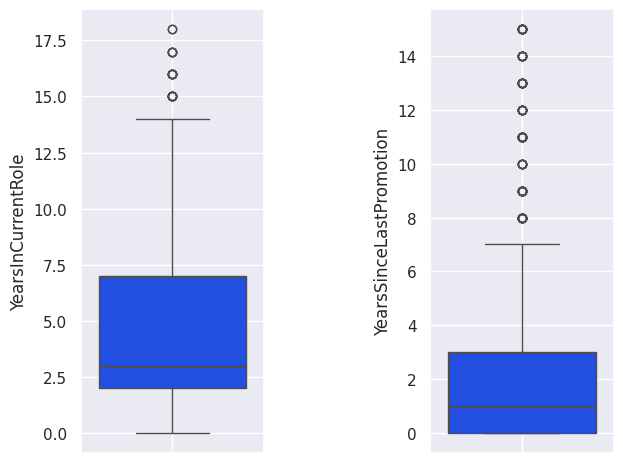

<Figure size 10000x1000 with 0 Axes>

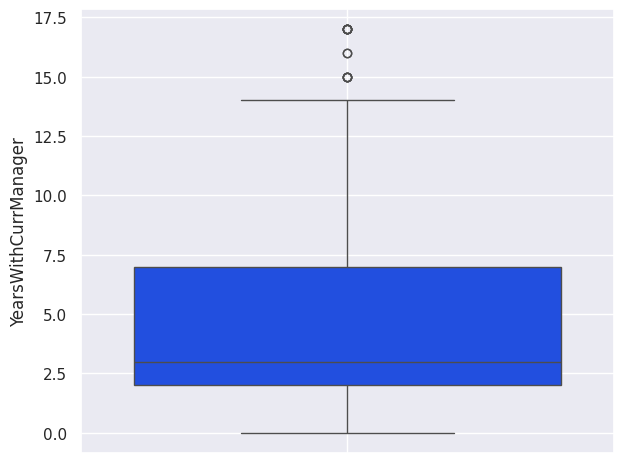

In [ ]:
box_plot_num(col=2,num_col_list=num_col, df=attrition,bin=10)

In [ ]:
def cnt_plot_cat(col,cat_col_list,df):
    col_cnt=len(cat_col_list)
    div=col
    if col_cnt%div==0:
        rows = int(col_cnt/div)
        print(f"rows={rows}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=cat_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.barplot(x=df[col_plot[i]].value_counts().values,y=df[col_plot[i]].value_counts().index,palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9, hspace=0.9)
            j=j+div
            row=row+1
        plt.show()
    else:
        rows = int(col_cnt/div)
        print(f"rows={rows+1}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=cat_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.barplot(x=df[col_plot[i]].value_counts().values,y=df[col_plot[i]].value_counts().index,palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9, hspace=0.9)
            j=j+div
            row=row+1
        plt.figure(figsize=(100,10))
        plt.subplots(1,(col_cnt-j))
        col_plot=cat_col_list[j:col_cnt]
        for i in range(0,(col_cnt-j)):
            plt.subplot(1,(col_cnt-j),i+1)
            sns.barplot(x=df[col_plot[i]].value_counts().values,y=df[col_plot[i]].value_counts().index,palette='bright')
            plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
        plt.subplots_adjust(wspace=0.9, hspace=0.9)
        plt.show()

rows=9, Col:2, Total:18


<Figure size 10000x1000 with 0 Axes>

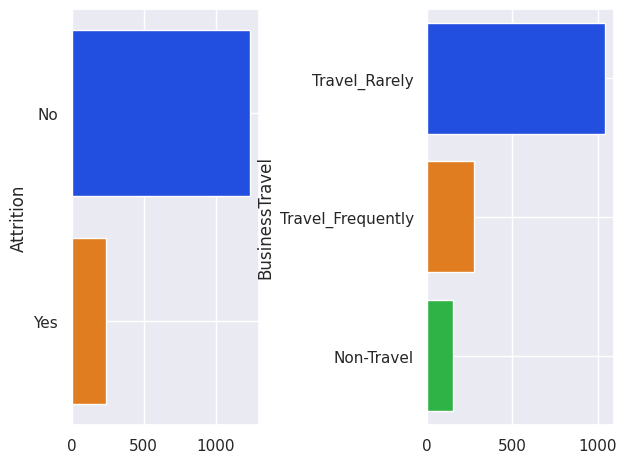

<Figure size 10000x1000 with 0 Axes>

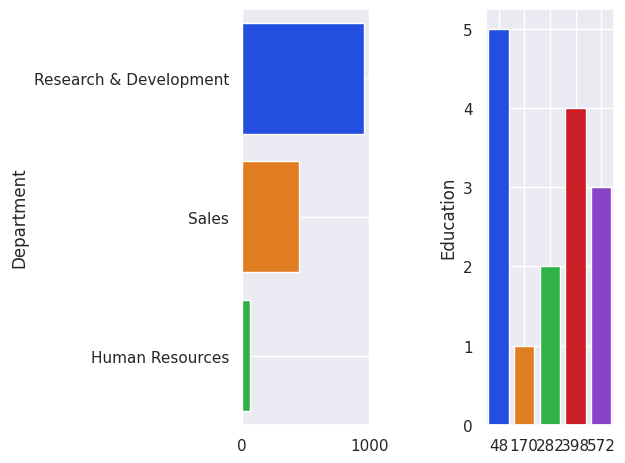

<Figure size 10000x1000 with 0 Axes>

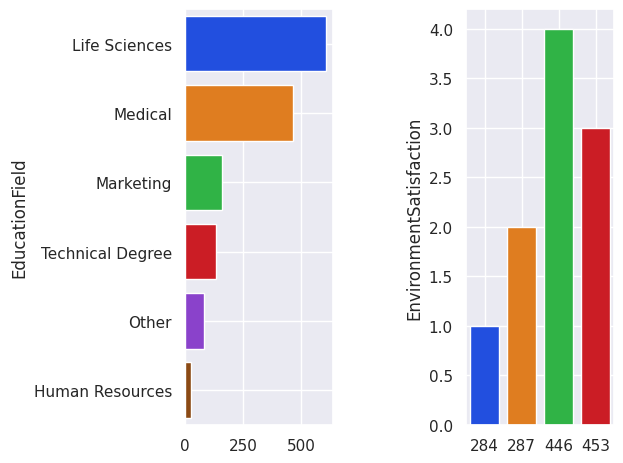

<Figure size 10000x1000 with 0 Axes>

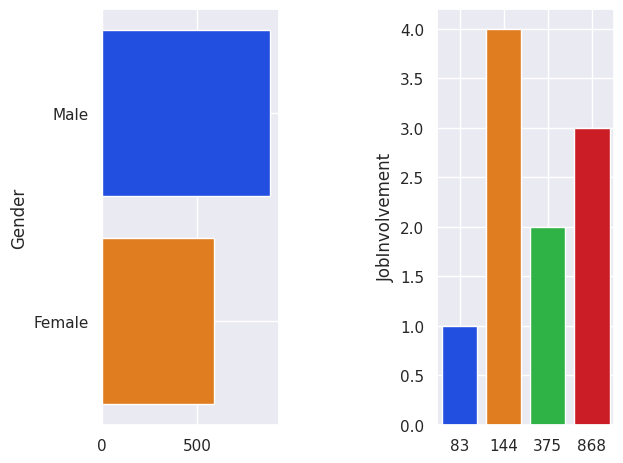

<Figure size 10000x1000 with 0 Axes>

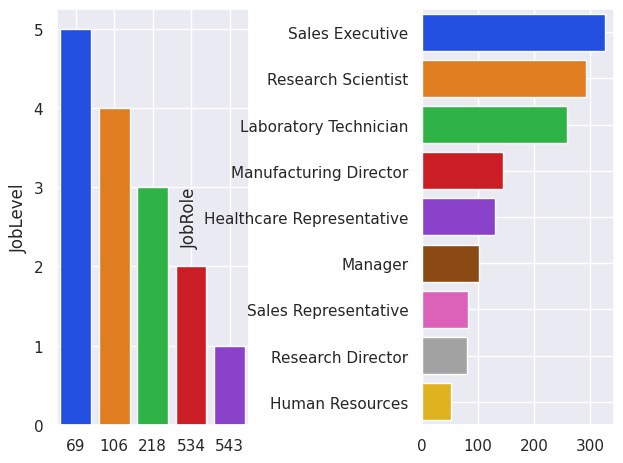

<Figure size 10000x1000 with 0 Axes>

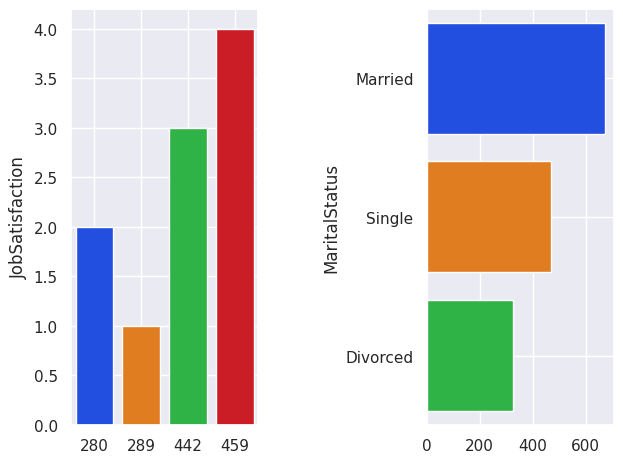

<Figure size 10000x1000 with 0 Axes>

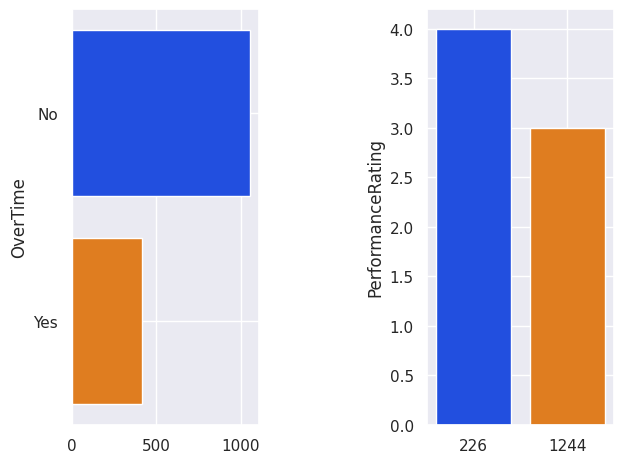

<Figure size 10000x1000 with 0 Axes>

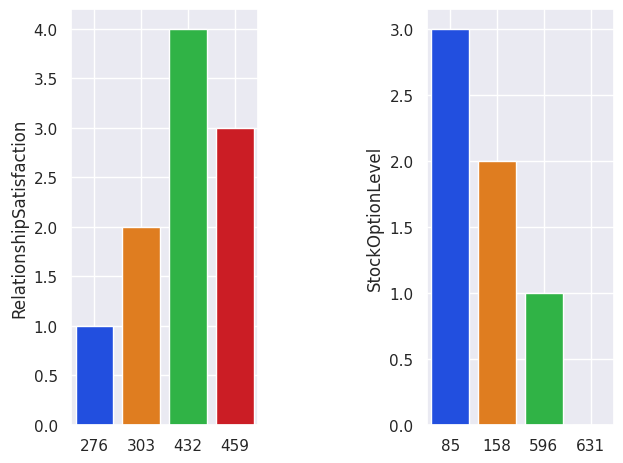

<Figure size 10000x1000 with 0 Axes>

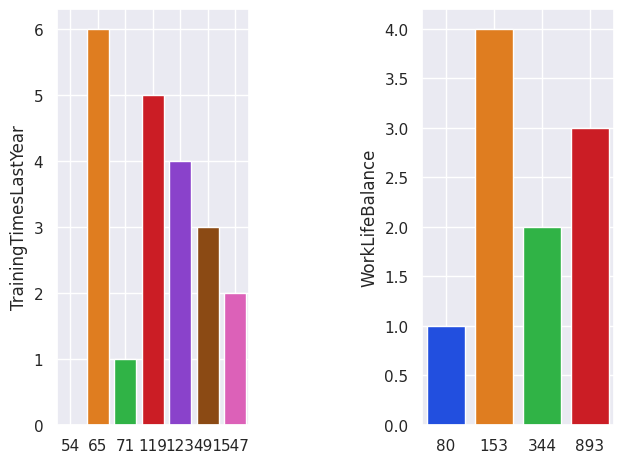

In [ ]:
cnt_plot_cat(col=2,cat_col_list=cat_col,df=attrition)

Total plots: 18
Max rows: 9, Max columns: 2


<Figure size 1000x1000 with 0 Axes>

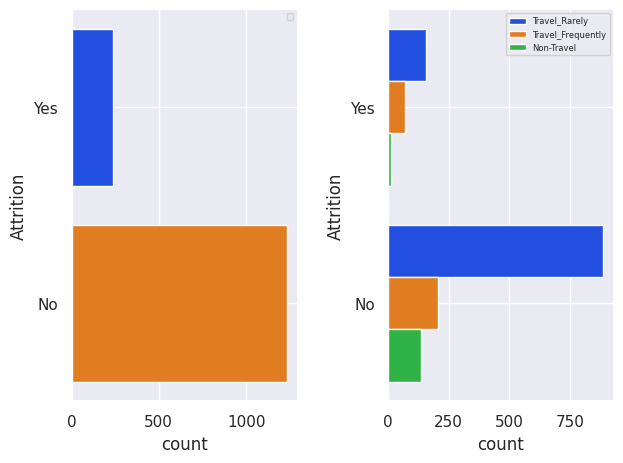

<Figure size 1000x1000 with 0 Axes>

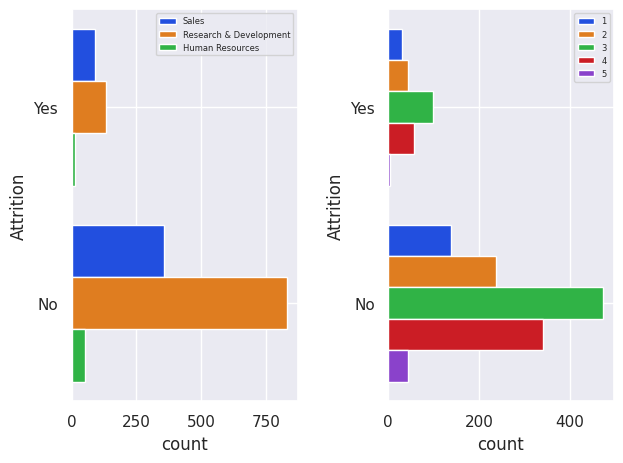

<Figure size 1000x1000 with 0 Axes>

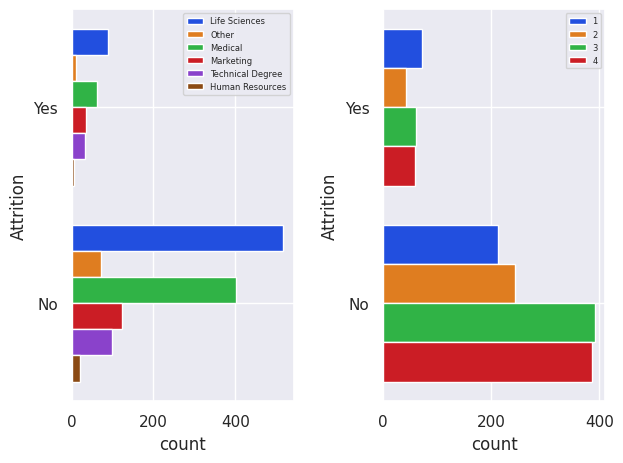

<Figure size 1000x1000 with 0 Axes>

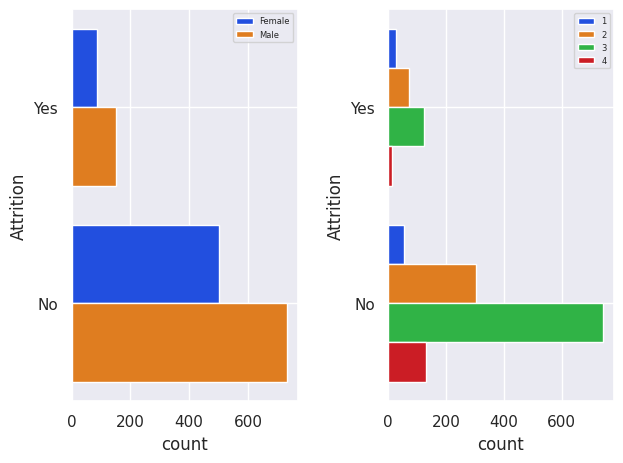

<Figure size 1000x1000 with 0 Axes>

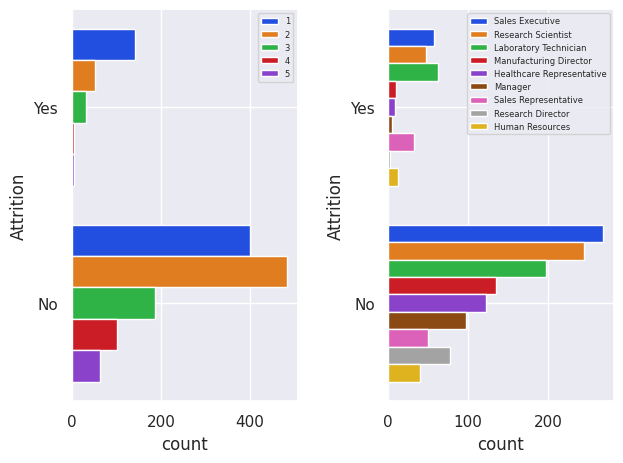

<Figure size 1000x1000 with 0 Axes>

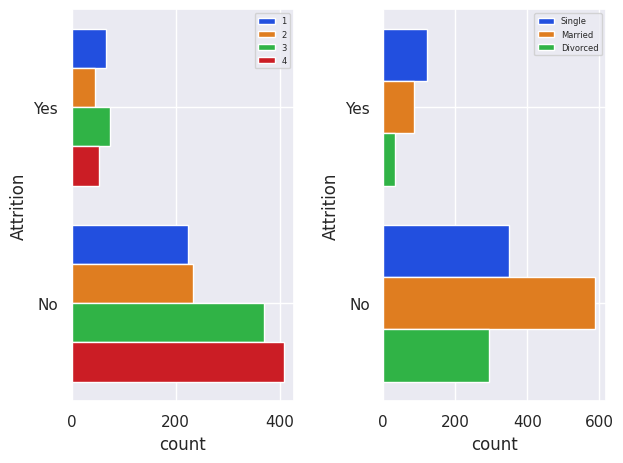

<Figure size 1000x1000 with 0 Axes>

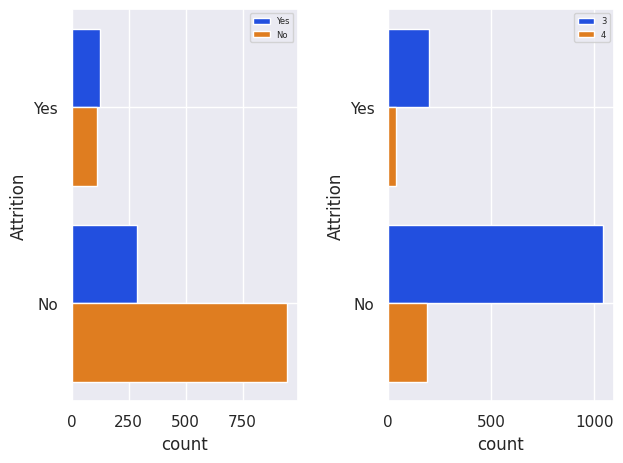

<Figure size 1000x1000 with 0 Axes>

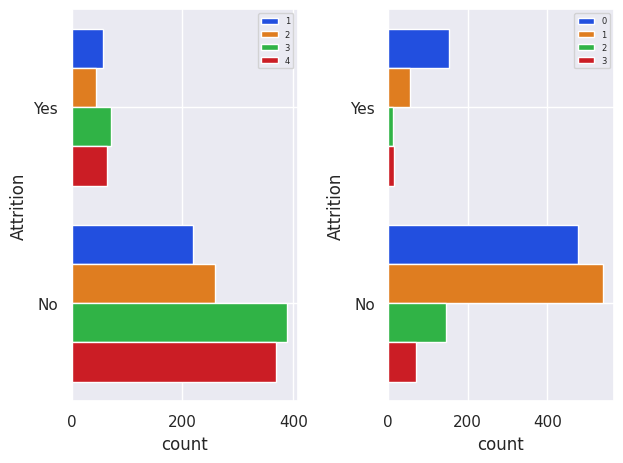

In [ ]:
total_plots=len(cat_col)
print(f"Total plots: {total_plots}")
col_div=2
max_rows=math.ceil(total_plots/col_div)
print(f"Max rows: {max_rows}, Max columns: {col_div}")
row=1
j=0
while row<max_rows:
  plt.figure(figsize=(10,10))
  plt.subplots(1,col_div)
  col_plot=cat_col[j:j+col_div]
  for i in range(len(col_plot)):
    plt.subplot(1,col_div,i+1)
    sns.countplot(data=attrition,y='Attrition',hue=col_plot[i], palette='bright')
    plt.legend(loc='upper right', fontsize=6)
    plt.grid(visible= True , which=  'both', axis = "both")
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1, wspace=0.4)
  j=j+col_div
  row=row+1
plt.show()

Total plots: 13
Max rows: 7, Max columns: 2


<Figure size 1000x1000 with 0 Axes>

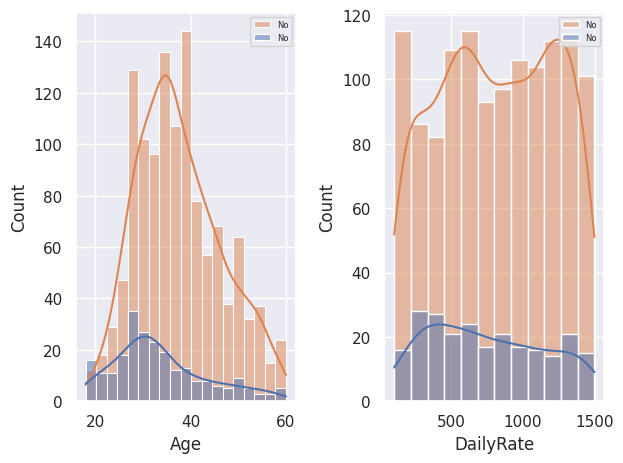

<Figure size 1000x1000 with 0 Axes>

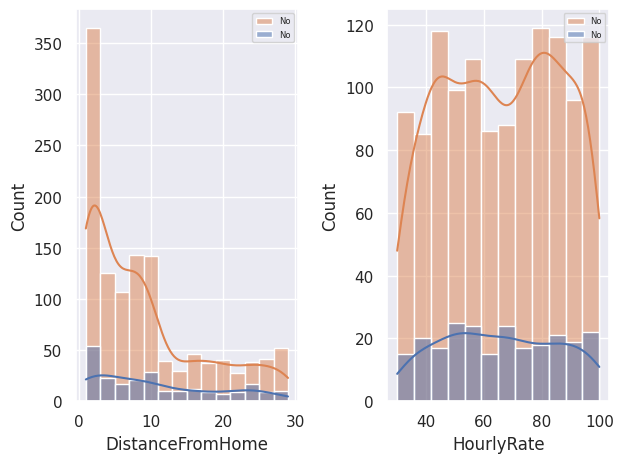

<Figure size 1000x1000 with 0 Axes>

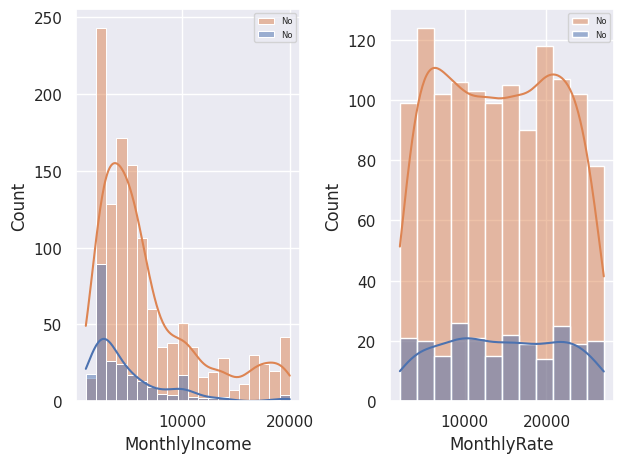

<Figure size 1000x1000 with 0 Axes>

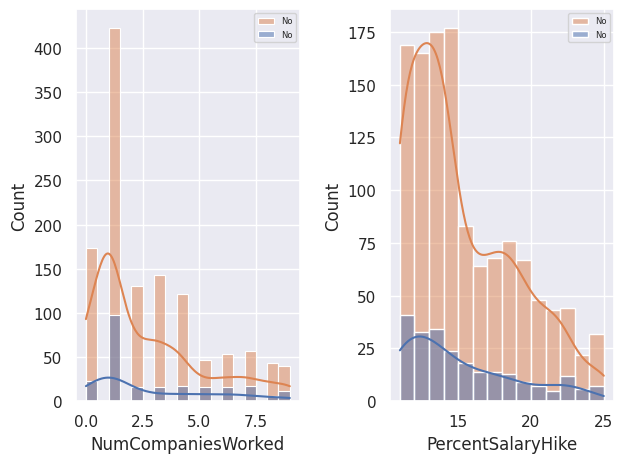

<Figure size 1000x1000 with 0 Axes>

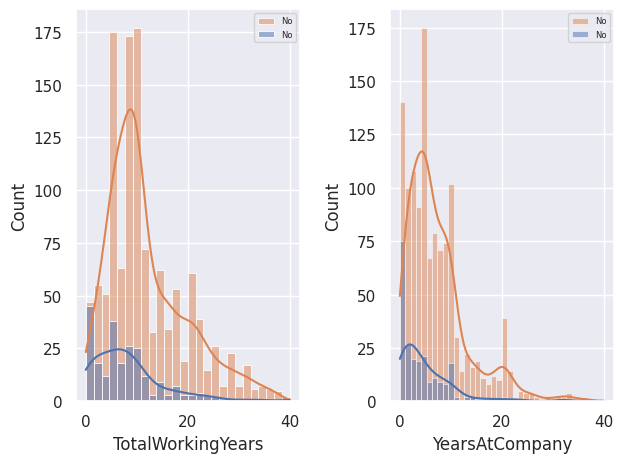

<Figure size 1000x1000 with 0 Axes>

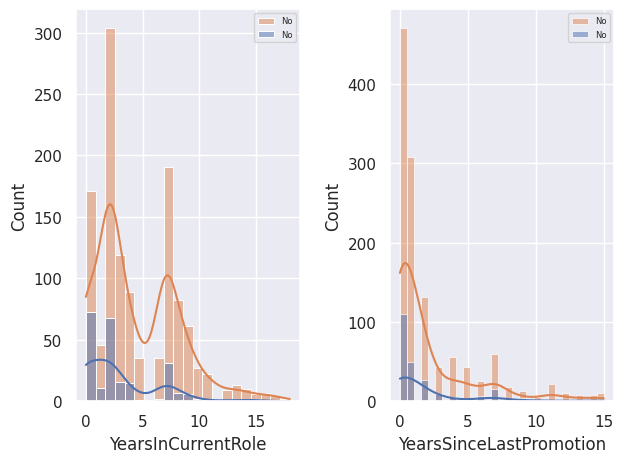

In [ ]:
total_plots=len(num_col)
print(f"Total plots: {total_plots}")
col_div=2
max_rows=math.ceil(total_plots/col_div)
print(f"Max rows: {max_rows}, Max columns: {col_div}")
row=1
j=0
while row<max_rows:
  plt.figure(figsize=(10,10))
  plt.subplots(1,col_div)
  col_plot=num_col[j:j+col_div]
  for i in range(len(col_plot)):
    plt.subplot(1,col_div,i+1)
    sns.histplot(data=attrition,x=col_plot[i],kde=True, label='No', hue='Attrition')
    plt.grid(visible= True , which=  'both', axis = "both")
    plt.legend(loc='upper right', fontsize=6)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1, wspace=0.4)
  j=j+col_div
  row=row+1
plt.show()

In [ ]:
x=attrition.drop(columns=['Attrition'])
y=attrition['Attrition']
x.shape, y.shape

((1470, 30), (1470,))

In [ ]:
ind_col=x.columns
print(ind_col)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
ind_num_col=num_col
print(ind_num_col)

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
ind_cat_col=[col for col in ind_col if col not in ind_num_col]
print(ind_cat_col)

['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
pd.crosstab(attrition['Attrition'],attrition['Education'])

Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


In [ ]:
chi2_contingency(pd.crosstab(attrition['Attrition'],attrition['Education']))

Chi2ContingencyResult(statistic=3.0739613982367193, pvalue=0.5455253376565949, dof=4, expected_freq=array([[142.59183673, 236.53469388, 479.77959184, 333.83265306,
         40.26122449],
       [ 27.40816327,  45.46530612,  92.22040816,  64.16734694,
          7.73877551]]))

In [ ]:
imp_cat_col=list()
for col in cat_col:
    chi2, pval,_,_ = chi2_contingency(pd.crosstab(attrition[col], attrition['Attrition']))
    if pval<=0.05:
      imp_cat_col.append(col)
      print(col, '---', pval)
      print(f"For {col} '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. \n ")
print(f"Final Important Categorical Column are:\n {imp_cat_col}")
imp_cat_col.remove("Attrition")

Attrition --- 0.0
For Attrition '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. 
 
BusinessTravel --- 5.608614476449931e-06
For BusinessTravel '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. 
 
Department --- 0.004525606574479633
For Department '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. 
 
EducationField --- 0.006773980139025212
For EducationField '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable depends on the other. 
 
EnvironmentSatisfaction --- 5.1234689062894205e-05
For EnvironmentSatisfaction '''Null Hypothesis: There is no association between the two variables ''' is rejected  and the distribution of one variable

In [ ]:
corr_df=pd.DataFrame(np.triu((attrition[ind_num_col].corr()),k=1), index=ind_num_col, columns=ind_num_col)
corr_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,0.0,0.010661,-0.001686,0.024287,0.497855,0.028051,0.299635,0.003634,0.680381,0.311309,0.212901,0.216513,0.202089
DailyRate,0.0,0.000000,-0.004985,0.023381,0.007707,-0.032182,0.038153,0.022704,0.014515,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.0,0.000000,0.000000,0.031131,-0.017014,0.027473,-0.029251,0.040235,0.004628,0.009508,0.018845,0.010029,0.014406
HourlyRate,0.0,0.000000,0.000000,0.000000,-0.015794,-0.015297,0.022157,-0.009062,-0.002334,-0.019582,-0.024106,-0.026716,-0.020123
MonthlyIncome,0.0,0.000000,0.000000,0.000000,0.000000,0.034814,0.149515,-0.027269,0.772893,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.017521,-0.006429,0.026442,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010238,0.237639,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.020608,-0.035991,-0.001520,-0.022154,-0.011985
TotalWorkingYears,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.628133,0.460365,0.404858,0.459188
YearsAtCompany,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.758754,0.618409,0.769212


<Axes: >

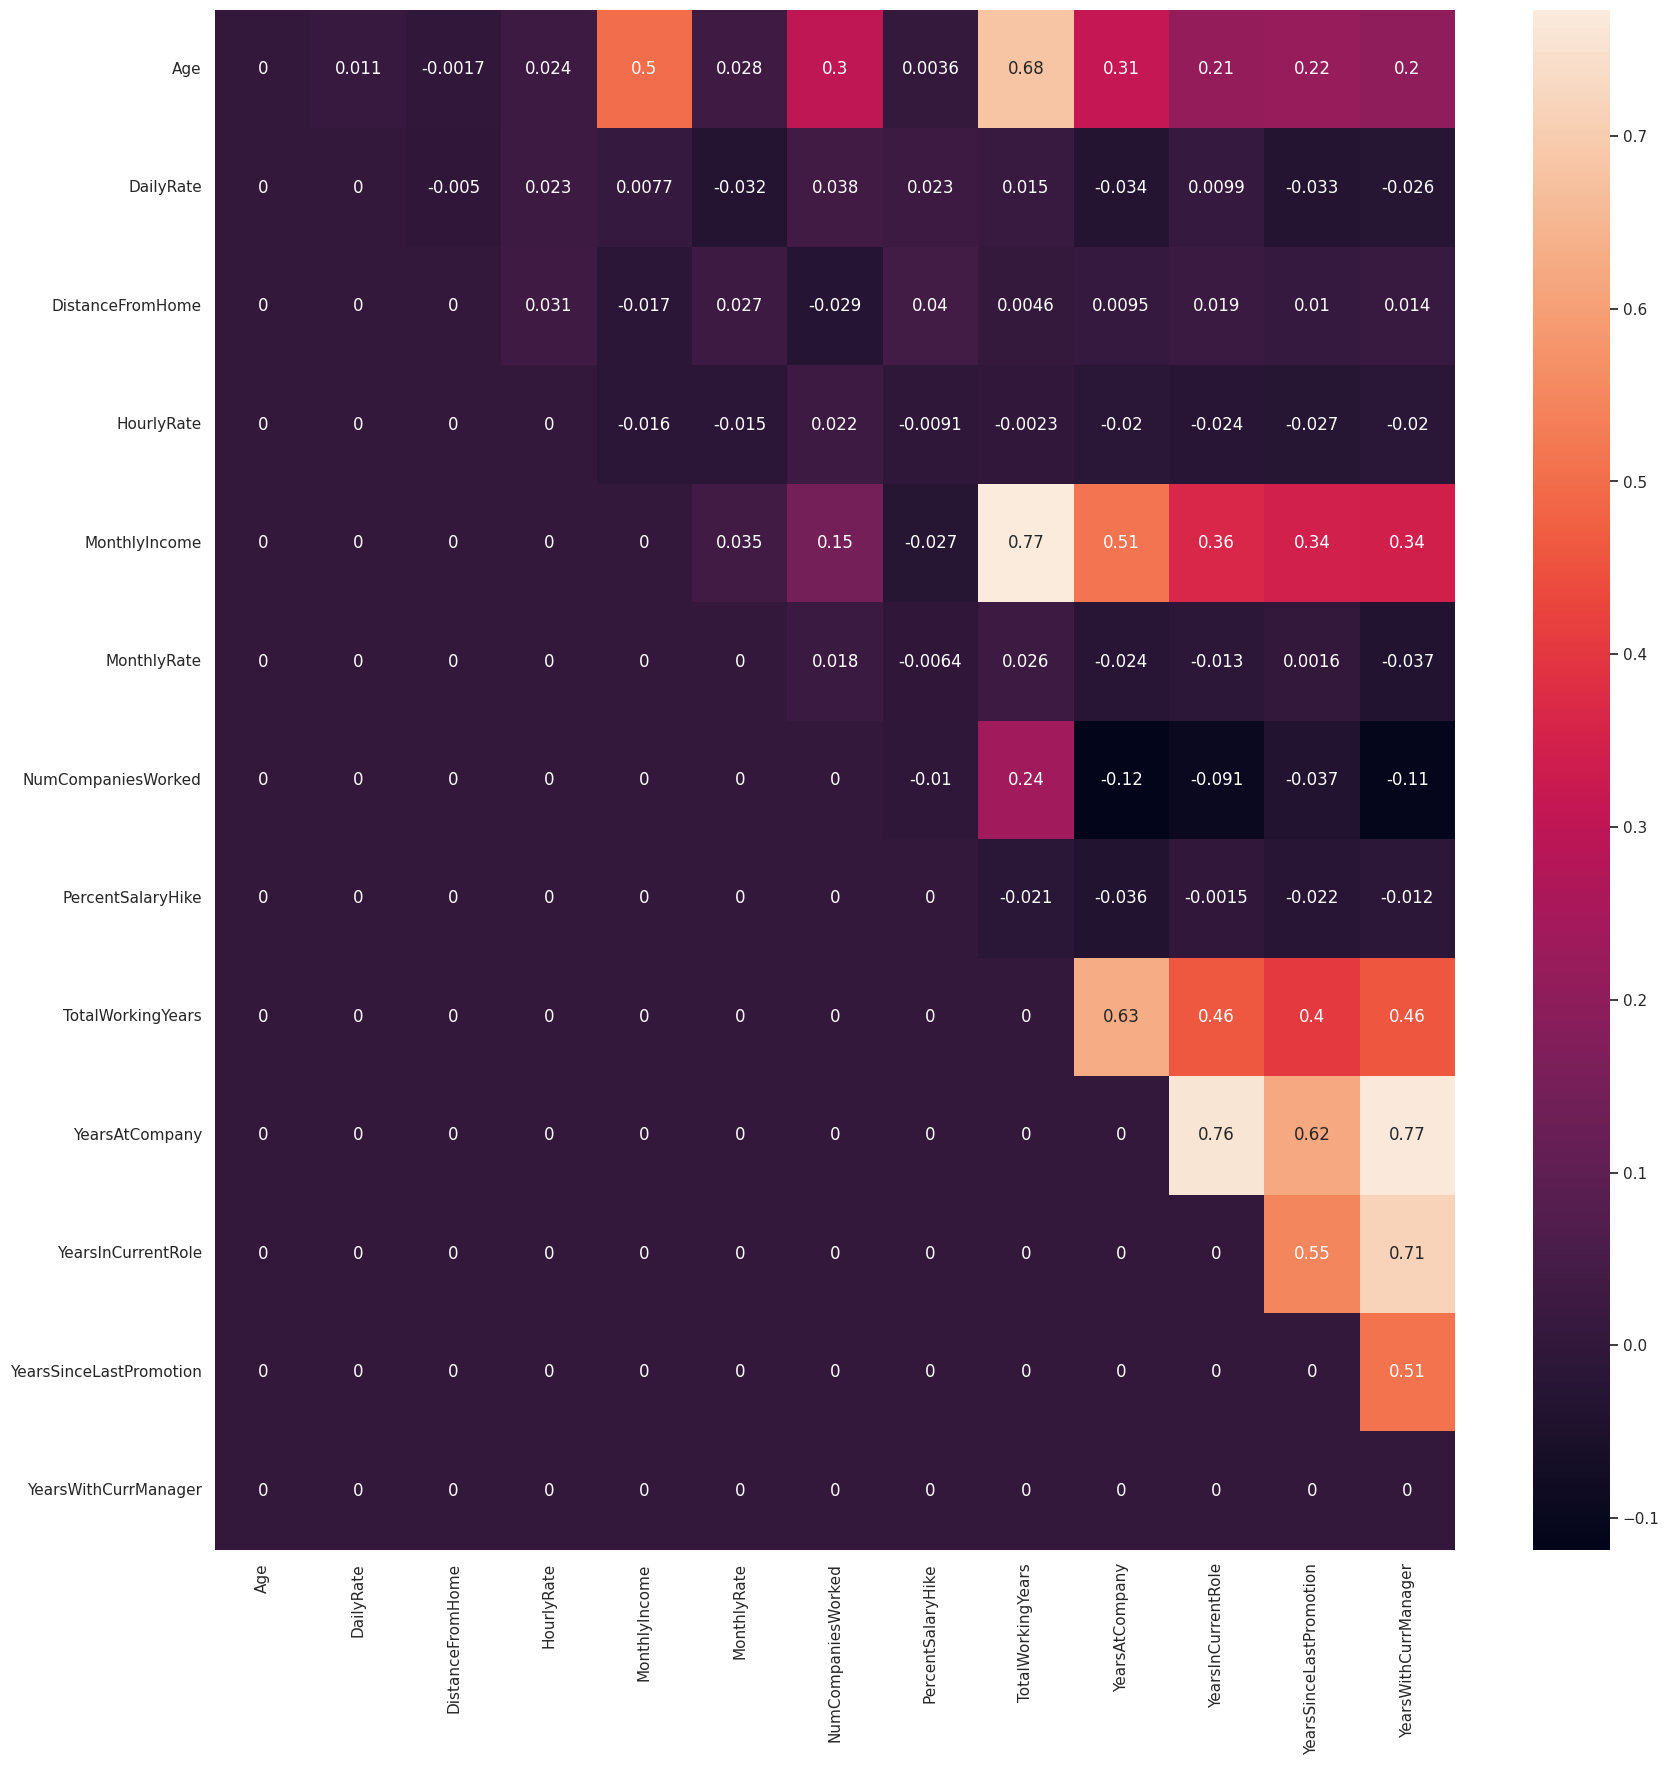

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True)

In [ ]:
high_corr_col=[]
for col in corr_df.columns:
  if corr_df[col].max() >=0.8:
    high_corr_col.append(col)
print(f"high_corr_col :{high_corr_col}")
imp_num_col=[col for col in ind_num_col if col not in high_corr_col]
print(imp_num_col)


high_corr_col :[]
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_df=pd.DataFrame()
vif_df["Features"]=imp_num_col
vif_df["VIF"]=[variance_inflation_factor(attrition[imp_num_col].values,i) for i in range(attrition[imp_num_col].shape[1])]
vif_df.sort_values(by="VIF",ascending=False, inplace=True)
len(vif_df),vif_df

(13,
                    Features        VIF
 0                       Age  24.485091
 7         PercentSalaryHike  13.187538
 8         TotalWorkingYears  13.134962
 9            YearsAtCompany  10.465346
 3                HourlyRate   9.630940
 4             MonthlyIncome   7.279137
 12     YearsWithCurrManager   6.379662
 10       YearsInCurrentRole   6.342205
 5               MonthlyRate   4.703445
 1                 DailyRate   4.691613
 6        NumCompaniesWorked   2.672514
 11  YearsSinceLastPromotion   2.437061
 2          DistanceFromHome   2.271344)

In [ ]:
vif_threshold=30
while vif_df["VIF"].max()>=vif_threshold:
  imp_num_col= vif_df[vif_df["VIF"]<=vif_threshold]["Features"].to_list()
  vif_df=pd.DataFrame()
  vif_df["Features"]=imp_num_col
  vif_df["VIF"]=[variance_inflation_factor(filled_data[imp_num_col].values,i) for i in range(filled_data[imp_num_col].shape[1])]
vif_df.sort_values(by="VIF",ascending=False, inplace=True)
imp_num_col= vif_df[vif_df["VIF"]<=vif_threshold]["Features"].to_list()
imp_num_col,len(imp_num_col)

(['Age',
  'PercentSalaryHike',
  'TotalWorkingYears',
  'YearsAtCompany',
  'HourlyRate',
  'MonthlyIncome',
  'YearsWithCurrManager',
  'YearsInCurrentRole',
  'MonthlyRate',
  'DailyRate',
  'NumCompaniesWorked',
  'YearsSinceLastPromotion',
  'DistanceFromHome'],
 13)

In [ ]:
final_imp_col=imp_num_col+imp_cat_col
final_imp_col

['Age',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'HourlyRate',
 'MonthlyIncome',
 'YearsWithCurrManager',
 'YearsInCurrentRole',
 'MonthlyRate',
 'DailyRate',
 'NumCompaniesWorked',
 'YearsSinceLastPromotion',
 'DistanceFromHome',
 'BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [ ]:
x=x[final_imp_col]
x.sample(n=5)

,Age,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,HourlyRate,MonthlyIncome,YearsWithCurrManager,YearsInCurrentRole,MonthlyRate,DailyRate,NumCompaniesWorked,YearsSinceLastPromotion,DistanceFromHome,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
737,41,14,8,2,42,5003,1,2,23371,549,6,2,7,Travel_Rarely,Research & Development,Medical,4,3,2,Manufacturing Director,3,Single,No,0,6,3
1448,41,11,14,5,57,8938,4,4,12227,930,2,0,3,Travel_Rarely,Sales,Life Sciences,3,2,2,Sales Executive,2,Divorced,No,1,5,3
624,53,18,35,5,78,10934,4,2,20715,661,7,0,7,Travel_Rarely,Sales,Marketing,1,2,3,Sales Executive,4,Married,Yes,1,3,3
600,32,12,14,14,98,6162,8,13,19124,859,1,6,4,Travel_Rarely,Research & Development,Life Sciences,3,2,2,Manufacturing Director,3,Married,No,1,3,3
632,42,14,8,2,35,2515,2,1,9068,1271,5,2,2,Travel_Frequently,Research & Development,Medical,2,3,1,Research Scientist,4,Single,Yes,0,2,3


In [ ]:
x.nunique()

,0
Age,43
PercentSalaryHike,15
TotalWorkingYears,40
YearsAtCompany,37
HourlyRate,71
MonthlyIncome,1349
YearsWithCurrManager,18
YearsInCurrentRole,19
MonthlyRate,1427
DailyRate,886


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [ ]:
y_trans=label_encoder.fit_transform(y)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
modeimpute=SimpleImputer(strategy='most_frequent')
knnimpute=KNNImputer(n_neighbors=5)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
onehotencoder=OneHotEncoder(drop='first')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
stdscaler=StandardScaler()
minmaxscaler=MinMaxScaler()
robustscaler=RobustScaler()

In [ ]:
cat_pipe_modeimpute_onehot=Pipeline(steps=[("impute",modeimpute),("encoding",onehotencoder)])
cat_pipe_modeimpute_onehot

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder(drop='first'))])

In [ ]:
num_pipe_knnimpute_robustscaler=Pipeline(steps=[("impute",knnimpute),("scaler",robustscaler)])
num_pipe_knnimpute_robustscaler

Pipeline(steps=[('impute', KNNImputer()), ('scaler', RobustScaler())])

In [ ]:
attrition[imp_num_col].sample(n=5)

,Age,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,HourlyRate,MonthlyIncome,YearsWithCurrManager,YearsInCurrentRole,MonthlyRate,DailyRate,NumCompaniesWorked,YearsSinceLastPromotion,DistanceFromHome
1247,31,19,6,5,51,8346,2,2,20943,1003,1,0,5
409,42,11,19,5,92,4556,2,4,12932,532,2,0,29
12,31,17,5,5,31,2911,3,2,15170,670,1,4,26
739,27,18,4,3,47,4227,2,2,4658,1055,0,2,2
1147,49,14,10,9,84,3211,4,6,22102,722,1,1,25


In [ ]:
attrition[imp_cat_col].sample(n=5)

,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
688,Travel_Rarely,Sales,Other,4,2,1,Sales Representative,2,Single,Yes,0,3,4
1073,Travel_Rarely,Research & Development,Life Sciences,3,1,2,Manufacturing Director,2,Married,No,2,2,2
336,Travel_Rarely,Research & Development,Other,2,1,1,Laboratory Technician,1,Married,Yes,0,4,2
924,Travel_Rarely,Research & Development,Life Sciences,3,3,1,Research Scientist,3,Married,Yes,0,3,3
1191,Travel_Rarely,Sales,Life Sciences,1,3,2,Sales Executive,4,Married,No,2,2,3


In [ ]:
impfea_preprocessor_pipeline=ColumnTransformer(
    transformers=[("cat_pipe_modeimpute_onehot",cat_pipe_modeimpute_onehot,imp_cat_col),
                  ("num_pipe_knnimpute_robustscaler",num_pipe_knnimpute_robustscaler,ind_num_col),
                  ],remainder="passthrough")
impfea_preprocessor_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_pipe_modeimpute_onehot',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder(drop='first'))]),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'EnvironmentSatisfaction',
                                  'JobInvolvement', 'JobLevel', 'JobRole',
                                  'JobSatisfaction', 'MaritalStatus',
                                  'OverTim...
                                  'TrainingTimesLastYear', 'WorkLifeBalance']),
                                ('num_pipe_knnimpute_robustscaler',
                                 Pipeline(steps=[('impute', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                                  'NumCompaniesWorked', 'PercentSalaryHike',
                                  'TotalWorkingYears', 'YearsAtCompany',
                                  'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager'])])

In [ ]:
x_scaled=impfea_preprocessor_pipeline.fit_transform(x)
x_scaled

array([[ 0.        ,  1.        ,  0.        , ...,  0.2       ,
        -0.33333333,  0.4       ],
       [ 1.        ,  0.        ,  1.        , ...,  0.8       ,
         0.        ,  0.8       ],
       [ 0.        ,  1.        ,  1.        , ..., -0.6       ,
        -0.33333333, -0.6       ],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.2       ,
        -0.33333333,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.6       ,
        -0.33333333,  1.        ],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.2       ]])

In [ ]:
attrition[['Attrition']].value_counts(normalize=True)

,proportion
Attrition,
No,0.838776
Yes,0.161224


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
smote = SMOTE()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_trans , test_size=0.2, random_state=101)
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((1176, 26), (294, 26), (1176,), (294,))

In [ ]:
rf_classifier=RandomForestClassifier(random_state=42)

In [ ]:
param_dist= {
    'n_estimators': list(range(10, 200)),
    'max_depth': list(range(1, 20)),
    'min_samples_split': list(range(2, 20)),
    'min_samples_leaf': list(range(1, 20)),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ["gini",'entropy']}

In [ ]:
random_search=  RandomizedSearchCV(estimator=rf_classifier,param_distributions=param_dist,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
impfea_smote_random_rfmodel_pipe=IMBPipeline(steps=[("preprocessor",impfea_preprocessor_pipeline),("oversampling",smote),("model",random_search)])
impfea_smote_random_rfmodel_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobRole', 'JobSatisf...
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12,
                                                                              13,
                                                                              14,
                                                                              15,
                                                                              16,
                                                                              17,
                                                                              18,
                                                                              19],
                                                         'min_samples_split': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10,
               

In [ ]:
impfea_smote_random_rfmodel_pipe.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobRole', 'JobSatisf...
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12,
                                                                              13,
                                                                              14,
                                                                              15,
                                                                              16,
                                                                              17,
                                                                              18,
                                                                              19],
                                                         'min_samples_split': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10,
               

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
print("Accuracy Report Hyper Parameter Tuning Random Forest Model\n")
print(f"Training Score: {impfea_smote_random_rfmodel_pipe.score(x_train,y_train)}\n")
print(f"Testing Score: {impfea_smote_random_rfmodel_pipe.score(x_test,y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,impfea_smote_random_rfmodel_pipe.predict(x_train))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,impfea_smote_random_rfmodel_pipe.predict(x_test))}")

Accuracy Report Hyper Parameter Tuning Random Forest Model

Training Score: 0.9447278911564626

Testing Score: 0.8571428571428571

Training Classfication Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       984
           1       0.93      0.71      0.81       192

    accuracy                           0.94      1176
   macro avg       0.94      0.85      0.89      1176
weighted avg       0.94      0.94      0.94      1176

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       249
           1       0.56      0.31      0.40        45

    accuracy                           0.86       294
   macro avg       0.72      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294



In [ ]:
best_rf_param=random_search.best_params_
best_rf_param

{'n_estimators': 106,
 'min_samples_split': 19,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 19,
 'criterion': 'entropy'}

In [ ]:
impfea_smote_rfmodel_pipe=IMBPipeline(steps=[("preprocessor",impfea_preprocessor_pipeline),("oversampling",smote),("model",rf_classifier.set_params(**best_rf_param))])
impfea_smote_rfmodel_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobRole', 'JobSatisf...
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager'])])),
                ('oversampling', SMOTE()),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=19,
                                        max_features='log2', min_samples_leaf=4,
                                        min_samples_split=19, n_estimators=106,
                                        random_state=42))])

In [ ]:
impfea_smote_rfmodel_pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe_modeimpute_onehot',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobRole', 'JobSatisf...
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager'])])),
                ('oversampling', SMOTE()),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=19,
                                        max_features='log2', min_samples_leaf=4,
                                        min_samples_split=19, n_estimators=106,
                                        random_state=42))])

In [ ]:
print("Accuracy Report Hyper Parameter Tuning Random Forest Model\n")
print(f"Training Score: {impfea_smote_rfmodel_pipe.score(x_train,y_train)}\n")
print(f"Testing Score: {impfea_smote_rfmodel_pipe.score(x_test,y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,impfea_smote_rfmodel_pipe.predict(x_train))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,impfea_smote_rfmodel_pipe.predict(x_test))}")

Accuracy Report Hyper Parameter Tuning Random Forest Model

Training Score: 0.9532312925170068

Testing Score: 0.8741496598639455

Training Classfication Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       984
           1       0.95      0.76      0.84       192

    accuracy                           0.95      1176
   macro avg       0.95      0.87      0.91      1176
weighted avg       0.95      0.95      0.95      1176

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       249
           1       0.68      0.33      0.45        45

    accuracy                           0.87       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.86      0.87      0.86       294



In [ ]:
import joblib

In [ ]:
joblib.dump(impfea_smote_rfmodel_pipe,"HR_Attrition_Emp_Model")

['HR_Attrition_Emp_Model']

In [ ]:
loaded_model=joblib.load("HR_Attrition_Emp_Model")

In [ ]:
loaded_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('cat_pipe_modeimpute_onehot',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoding',
                                                     OneHotEncoder(drop='first'))]),
                                    ['BusinessTravel', 'Department',
                                     'EducationField', 'EnvironmentSatisfaction',
                                     'JobInvolvement', 'JobLevel', 'JobRole',
                                     'JobSatisfaction', 'MaritalStatus',
                                     'OverTim...
                                     'TrainingTimesLastYear', 'WorkLifeBalance']),
                                   ('num_pipe_knnimpute_robustscaler',
                              